# Cálculos con funciones holónomas

##  Área de la pantalla de una televisión

Primero debemos importar algunos paquetes que necesitaremos durante esta parte del trabajo.

In [1]:
from matplotlib.pyplot import plot, savefig, subplots
from random import random
from numpy import linspace
from time import time
from sympy.solvers import solve as ssolve
from sympy import Symbol

In [2]:
t0_archivo = time() # Calcularemos el tiempo total de ejecución del archivo

### Cálculo del área por muestreo

La primera función que vamos a calcular es la que dada el tamaño de una muestra nos hace un muestreo y nos calcula el área relativa de nuestra región $$S = \{ (x,y) \in \mathbb{R}^2 \ | \ x^4+y^4+\frac{1}{100}xy - 1 \leq 0 \}.$$

In [3]:
def muestreo(tamaño):
    t0 = time()
    contador = 0 # El contador va a ser el número de muestras que hallamos obtenido
    correctos = 0 # Serán el número de puntos que hemos obtenido en S
    while contador < tamaño:
        x = random()*2.4-1.2
        y = random()*2.4-1.2
        if x^4 + y^4 + (1/100)*x*y - 1 <= 0: # Comprobamos si están en el interior de S
            plot(x,y,'co',markersize=1) # Si están los pintamos de cian
            correctos += 1 # Y añadimos que hemos obtenido un acierto
        else:
            # Si lo anterior no ocurre, el punto estaba fuera, lo pintamos de coral entonces
            plot(x,y,'o',color = 'coral',markersize=1)
        contador += 1 # Por último aumentamos el tamaño de la muestra
    fraccion = correctos/tamaño # Calculamos la fracción de la muestra que ha acertado
    area = (2.4^2)*fraccion # Y lo multiplicamos por el área total del cuadrado
    t1 = time()
    # Finalmente hacemos un "pretty print" que nos devuelva los datos que hemos obtenido con la muestra aleatoria
    print(f"""Con una muestra de tamaño {tamaño}, han acertado {correctos} puntos, que corresponde con un 
{round(fraccion*100,2)}% del area del cuadrado, por lo que obtenemos una aproximación de que el área
de la TV es {area}.
Calculado en {t1-t0} segundos.""")

Además de pintar la muestra nos gustaría poder dibujar la frontera de la curva con la que estamos trabajando, para ello necesitamos un dato que después calcularemos, que es $x0$.

Sage no nos deja dibujar la curva a partir de la ecuación en forma $q(x,y)=0$, por lo que tomaremos una muestra de la $x$ con suficientes puntos como para que la representación sea fiel, y resolveremos la ecuación en $y$ dada por $q(x,y)=0$ para cada $x$ fijo, con eso podremos dibujar la curva.

In [4]:
x0 = 1.000254465850258845478545766643566750080196276158976351763236 # Tomamos el x0 que conseguiremos un poco más tarde
xp = linspace(-x0,x0,200) # Tomamos una muestra en el intervalo de 200 puntos que serán suficientes para la representación
y = Symbol('y')
yp1 = [] 
yp2 = []
for x in xp:
    # Dado que es una ecuación de grado 4 tendrá 4 soluciones, de las cuales sabemos que 2 serán reales, 
    # que son las que nos interesan
    ys = ssolve(x^4+y^4+(1/100)*x*y-1,y)
    y1 = ys[0]
    y2 = ys[1]
    yp1 += [y1]
    yp2 += [y2]

Ya solo nos queda dibujar todo lo que tenemos, en este caso tomamos una muestra de $20000$ puntos para ser lo más precisos que podamos, y que el cálculo sea moderadamente rápido.

Con una muestra de tamaño 20000, han acertado 12849 puntos, que corresponde con un 
64.25% del area del cuadrado, por lo que obtenemos una aproximación de que el área
de la TV es 3.70051200000000.
Calculado en 17.388654470443726 segundos.


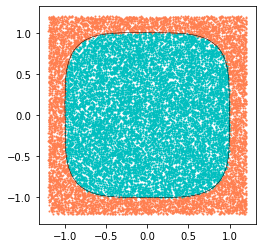

In [5]:
fig1, ax = subplots() # Estos dos primeros comandos son simplemente para que el dibujo quede bonito
ax.set_box_aspect(1)
muestreo(20000)
plot(xp,yp1,'black',linewidth=0.5)
plot(xp,yp2,'black',linewidth=0.5)
savefig('muestreoConBorde.png',dpi=600,transparent=True) # Y este último para guardar la imagen y poder añadirla al TFG

### Cálculo de los puntos extremos

In [6]:
R.<T> = QQ[] # Definimos el espacio donde trabajaremos
x,y = var('x,y') # Y nuestras variables

In [7]:
# Definimos las dos funciones para las que vamos a calcular la resultante
q = y^4 + x^4 + (1/100)*x*y - 1
dqy = diff(q,y)
dqy

4*y^3 + 1/100*x

In [8]:
p = q.subs({x:-400*T^3, y:T}); # Dado que la derivada es nula, despejamos y sustituimos en la ecuación de q
sols =[sol[0] for sol in R(p).roots(AA)] # Con esto conseguimos el valor de la variable y
coord = [[-400*sol^3,sol] for sol in sols] # Coordenadas de las soluciones
x0 = coord[1][0]
x1 = coord[0][0]
x0.n(digits=50)

-1.0002544658502588454785457666435667500801962761590

### Cálculo del área mediante operadores diferenciales

In [9]:
from ore_algebra import *

In [10]:
Dops, x, Dx = DifferentialOperators(QQ, 'x')
digitos = 100
precision = 10^(-digitos)

In [11]:
P1 = (1+2*x^4)^2*(-25600000000+76799999973*x^4+25600000000*x^8*(-3+x^4))*Dx^3
P2 = 6*x^3*(1+2*x^4)*(179199999973-307199999946*x^4+25600000000*x^8*(3+2*x^4))*Dx^2
P3 = 3*x^2*(307199999953+4*x^4*(-876799999861+723199999893*x^4+25600000000*x^8*(2+x^4)))*Dx
P4 = 3*x*(51199999993+4*x^4*(-262399999957+364799999949*x^4+25600000000*x^8*(2+x^4)))
P = P1 + P2 + P3 - P4

In [12]:
(P*Dx).local_basis_expansions(1)

[1,
 (x - 1) - 3160493827/8*(x - 1)^4 - 82804938263/120*(x - 1)^5 - 71427160505/432*(x - 1)^6,
 (x - 1)^2 + 1/12*(x - 1)^4 + 460799999941/180*(x - 1)^5 - 170666666573/648*(x - 1)^6,
 (x - 1)^3 + 1/2*(x - 1)^4 + 41/60*(x - 1)^5 + 1553066666627/216*(x - 1)^6]

Recordemos que tenemos expresado nuestra solución $w$ localmente en un punto no singular $x_{ord} \in \mathbb{R}$ como $$ w(x) 
= c_{x_{ord}} + c_{x_{ord},1}(x-x_{ord}) + c_{x_{ord},2}(x-x_{ord})^2 + c_{x_{ord},3}(x-x_{ord})^3 + \mathcal{O}((x-x_{ord})^4).$$

Nuestro operador diferencial es de orden 4, por lo que necesitaremos 4 condiciones iniciales, estas son: 
$$ w(x_0) = 0, \ w'(0) = 2 \ \text{y} \ w'(1)=w'(-1)=\frac{1}{\sqrt[3]{100}}. $$

El problema que nos presentan estas condiciones es que están en puntos distintos, por lo que necesitaremos recurrir al cálculo de matrices de transición para hallar los coeficientes de $w$ con respecto a la base que hemos tomado. Nuestro objetivo es plantear un sistema de ecuaciones donde las soluciones sean los coeficientes en el punto $x_{ord}$.

Por comodidad, vamos a tomar $x_{ord} = 0$, veamos como se transforman las restricciones que tenemos. Para empezar, localmente en $0$ nuestro polinomio es de la forma $$ w(x) = c_{0,0} + c_{0,1}x + c_{0,2}x^2 + c_{0,3}x^3.$$

La segunda condición podemos aplicarla directamente, ya que $x_{ord} = 0$, por lo que $w'(0)=2$ significa que $c_{0,1} = 2$. Como nuestras incognitas son $c_{0,0},c_{0,1},c_{0,2},c_{0,3}$, las llamaremos $c0,c1,c2,c3$, respectivamente, por comodidad.

Vamos a crear una función que nos calcule el área de nuestra superficie directamente una vez reciba una serie de variables necesarias:
- `operador`: el operador diferencial que anula a nuestra función.
- `cond`: una lista de tipletas `(a,b,c)` con las condiciones que debemos imponer, donde:
    - `a` es la derivada de la función a la que le imponemos la condición (si `a=0` es la función sin derivar).
    - `b` es el punto donde aplicamos la condición.
    - `c` es la condición en el punto `b`.
- `punto`: es el punto en el que queremos calcular el valor de nuestra función.
- `digitos`: el número de dígitos de precisión que buscamos.

Este procedimiento asume que la base en cada $\widehat{x}$ está compuesta por monomios de grado ascendente, hasta el número de condiciones menos uno. Y que los coeficientes que calcularemos antes de pasar a nuestro `punto` es el primero de la lista `cond`, en nuestro caso el $0$. 

In [13]:
def area(operador,cond,punto,digitos):
    t_ini = time() # Vamos a contar el tiempo que tarda en calcular la solución
    precision = 10^(-digitos)
    n = len(cond) # n será el número de varibles con las que trabajamos
    c = var(','.join('c%s'%i for i in range(n))) # Necesitamos definirlas como variables para que Sage trabaje bien con ellas
    variables = vector([var for var in c]) # Pero más tarde también las necesitaremos como vector
    func = [cond[i][0] for i in range(n)] # Esta lista contiene los órdenes de las derivadas
    ptos = [cond[i][1] for i in range(n)] # Esta, los puntos en los que imponemos las condiciones
    cond_ini = vector([cond[i][2] for i in range(n)]) # Esta, las condiciones que imponemos
    x_ord = ptos[0] # Como hemos dicho antes, asumimos que queremos centrarlo todo en el primer punto
    # La condición del punto en el que estamos centrados no necesita matrices de transición, así que la añadimos directamente
    condiciones = [variables[func[0]]-cond_ini[0]]
    # Para el resto de condiciones, como hemos explicado arriba, necesitamos una matriz de transición e imponer que
    # el coeficiente correspondiente a la derivada de la función en la que imponemos la condición cumpla la condición
    for j in range(1,n):
        # Cuando pasamos por un punto singular la función numerical_transition_matrix devuelve un error, una forma de 
        # arreglarlo es tomar un camino en los complejos entre los puntos que queremos pero sin pasar por la singularidad
        # por ese motivo, intentamos (try) calcular la numerical_transition_matrix, y si no es posible (except) le indicamos
        # un punto del plano complejo por el cual evitaremos la singularidad
        try:
            m = operador.numerical_transition_matrix([x_ord,ptos[j]],precision) # Calculamos la matriz de transición
        except Exception as e:
            print(e)
            salto = complex(input("Inserte punto intermedio "))
            m = operador.numerical_transition_matrix([x_ord,salto,ptos[j]],precision)
        m = m.apply_map(lambda x : x.mid()) # La ponemos de una forma en la que podamos trabajar con ella
        # Añadimos la condición de que la matriz de transición aplicada a nuestros coeficientes incógnita, tomando solo
        # el coeficiente que nos interesa, verifique la condición que imponemos
        condiciones += [(m*variables)[func[j]]-cond_ini[j]]
    Mc = Matrix([[c.coefficient(var) for var in variables] for c in condiciones]) # Obtenemos la matriz del sistema
    # Tenemos un sistema de la forma Mc*variables=cond_ini => variables = Mc^(-1)*cond_ini
    coef_ord = (Mc.inverse())*cond_ini
    # Por último calculamos la matriz de transición de nuestro punto referencia al punto al que queremos llegar
    try:
        M = operador.numerical_transition_matrix([x_ord,punto],precision)
    except Exception as e:
        print(e)
        salto = complex(input("Inserte punto intermedio "))
        M = operador.numerical_transition_matrix([x_ord,salto,punto],precision)
    M = M.apply_map(lambda x : x.mid())
    # Y se la aplicamos a los coeficientes que hemos obtenido, el área que buscamos será el primero
    coef = M*coef_ord
    t_fin = time()
    print(f'El área de nuestra superficie es {coef[0]}. \nCalculado en {t_fin-t_ini} segundos.')
    return coef[0]

Veamos como expresar los argumentos para que nuestra función los entienda:
- Para empezar, nuestro `operador` es $P*Dx$, entonces simplemente

In [14]:
operador = P*Dx

- Las condiciones son $$ w(x_0) = 0, \ w'(0) = 2 \ \text{y} \ w'(1)=w'(-1)=\frac{1}{\sqrt[3]{100}}, $$
entonces:
    - $w'(0)=2$, es la primera derivada en $0$ y vale $2$ => $(1,0,2)$.
    - $w'(1)= \frac{1}{\sqrt[3]{100}}$, es la primera derivada en $1$ y vale $100^{-1/3}$ => $(1,1,(100)^{-1/3})$.
    - $w'(-1)= \frac{1}{\sqrt[3]{100}}$, es la primera derivada en $-1$ y vale $100^{-1/3}$ => $(1,-1,(100)^{-1/3})$.
    - $w(x_0)=0$, es la derivada $0$ en $x_0$ y vale $0$ => $(0,x0,0)$.

Ponemos la primera la de $0$, porque queremos centrarnos en el $0$ por comodidad, con el resto sería igual. Además vamos a calcular $(100)^{-1/3}$ con un poco más de precisión para reducir al máximo el error cometido.

In [15]:
s = (T^3-1/100).roots(AA)[0][0]

Ya podemos crear el vector `cond`:

In [16]:
cond = [(1,0,2),(1,1,s),(1,-1,s),(0,x0,0)]

- El `punto` es $x_1$, que ya está calculado.
- Y por último, los `digitos` que también los tenemos ya expresados.

Ya solo nos queda juntarlo todo y pedirle a `Sage` que calcule el área.

In [17]:
TV = area(operador,cond,x1,digitos)

El área de nuestra superficie es 3.7081599447421622883482255611458653712430658199139347094385721323867607641628396904239116597636019645 + 8.8780784766757392693328167265720144249079010750936616219468647212927823727098095784034723386936110064e-625*I. 
Calculado en 226.98939275741577 segundos.


# Volúmenes

## Funciones previas

In [18]:
Dop, t, D = DifferentialOperators(QQ, 't')

In [19]:
R.<T> = QQ[] # Definimos el espacio donde trabajaremos
x,y,z = var('x,y,z') # Y nuestras varibles

In [20]:
precision = 100

Primero creamos una función que nos devolverá los extremos de una función dada, esto nos hará mucho más cómodo la selección de los puntos en los que imponer las condiciones de nuestra ecuación diferencial.

In [21]:
def extremos(funcion):
    f = funcion
    dfz = diff(f,z)
    res = f.resultant(dfz,z)
    res = res.subs({y:T})
    sols = [root[0] for root in R(res).roots(AA)]
    y0 = min(sols)
    y1 = max(sols)
    print('y0 = ',y0,'\ny1 = ',y1)
    return y0,y1

Para el cálculo del área de una región, con el método que estamos aplicando, necesitamos calcular la longitud de la preimagen para ciertos valores. Por comodidad he creado una función que dado dichos valores nos halle la longitud de dicho segmento.

Esta función lo devuelve de una forma coherente con la función `area` que he construido anteriormente.

In [22]:
def condiciones(puntos,funcion):
    cond = []
    # Quitamos el último punto porque siempre será el
    # valor inicial de nuestra integral, por lo que 
    # su condición será que el valor sea nulo
    for punto in puntos[:-1]:
        # Primero substituimos el punto y hallamos los
        # valores de la preimagen
        fun = funcion.subs({y:punto,z:T})
        sols = [root[0] for root in R(fun).roots(AA)]
        n = len(sols)
        # Por último vamos restando dos a dos hasta
        # obtener el resultado
        valor = 0
        for r in range(n/2):
            valor += sols[2*r+1]-sols[2*r]
        cond += [(1,punto,valor)]
    cond += [(0,puntos[-1],0)]
    return cond

Como ya dijimos los anuladores están calculados en `Mathematica` con la función `Annihilator` del paquete `RISC HolonomicFunctions`. Como no podemos copiar y pegar directamente estos anuladores de `Mathematica`, la función `clean` se encarga de pasarlos a una forma que entienda `SageMath`.

In [23]:
def clean(text):
    text = text.replace(" y","*y")
    text = text.replace(" ","")
    text = text.replace("\n","")
    text = text.replace("y","t")
    for i in range(len(text)):
        if text[i] == "(":
            try:
                a = int(text[i-1])
                text = text[:i]+"*"+text[i:]
            except:
                continue            
    return text

## Cálculo del volumen de un toro

Calcularemos el volumen de un toro con circunferencia exterior de radio $2$ y la interior de radio $1$. Dicha región viene dada por $$\{ (x,y,z) \in \mathbb{R}^3 \ | \ (x^2+y^2+z^2+3)^2-16(x^2+y^2) \leq 0 \}. $$

Este ejemplo, así como el anulador, lo hemos obtenido del árticulo de Pierre Lairez, Marc Mezzarobba y Mohab Safey El Din, [Computing the volume of compact semi-algebraic sets](https://arxiv.org/abs/1904.11705).

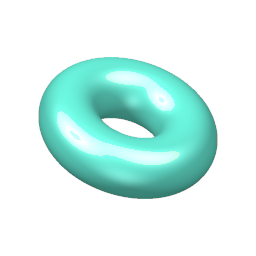

In [24]:
t0_toro = time() # Calcularemos el tiempo que tarda el programa en calcular el volumen

In [25]:
f = (x^2+y^2+z^2+3)^2-16*(x^2+y^2)

In [26]:
P_v = ((t-3)*(t+3)*(t-1)^2*(t+1)^2*t^2)*D^3+((t^2+9)*(t-1)^2*(t+1)^2*t)*D^2-((2*t^4+11*t^2-9)*(t-1)*(t+1))*D+2*(t^2+3)*t^3
operador_v = P_v*D

Primero calculamos los extremos de $x$, que serán nuestros límites de integración.

In [27]:
resy = f.resultant(diff(f,y),y)
resz = f.resultant(diff(f,z),z)

In [28]:
%time s = ssolve([f,resy,resz],x,y,z,solution_dict=True)
s

CPU times: user 688 ms, sys: 0 ns, total: 688 ms
Wall time: 695 ms


[{x: -7, y: -2*sqrt(10)*I, z: -2*sqrt(6)*I},
 {x: -7, y: -2*sqrt(10)*I, z: 2*sqrt(6)*I},
 {x: -7, y: 2*sqrt(10)*I, z: -2*sqrt(6)*I},
 {x: -7, y: 2*sqrt(10)*I, z: 2*sqrt(6)*I},
 {x: -5, y: -2*sqrt(6)*I, z: -2*sqrt(2)*I},
 {x: -5, y: -2*sqrt(6)*I, z: 2*sqrt(2)*I},
 {x: -5, y: 2*sqrt(6)*I, z: -2*sqrt(2)*I},
 {x: -5, y: 2*sqrt(6)*I, z: 2*sqrt(2)*I},
 {x: -4, y: -4*I, z: -sqrt(3)*I},
 {x: -4, y: -4*I, z: sqrt(3)*I},
 {x: -4, y: 4*I, z: -sqrt(3)*I},
 {x: -4, y: 4*I, z: sqrt(3)*I},
 {x: -3, y: 0, z: 0},
 {x: -3, y: 0, z: -2*sqrt(6)*I},
 {x: -3, y: 0, z: 2*sqrt(6)*I},
 {x: -3, y: -2*sqrt(2)*I, z: 0},
 {x: -3, y: 2*sqrt(2)*I, z: 0},
 {x: -1, y: 0, z: 0},
 {x: -1, y: 0, z: -2*sqrt(2)*I},
 {x: -1, y: 0, z: 2*sqrt(2)*I},
 {x: -1, y: -2*sqrt(2), z: 0},
 {x: -1, y: 2*sqrt(2), z: 0},
 {x: 0, y: 0, z: -sqrt(3)*I},
 {x: 0, y: 0, z: sqrt(3)*I},
 {x: 1, y: 0, z: 0},
 {x: 1, y: 0, z: -2*sqrt(2)*I},
 {x: 1, y: 0, z: 2*sqrt(2)*I},
 {x: 1, y: -2*sqrt(2), z: 0},
 {x: 1, y: 2*sqrt(2), z: 0},
 {x: 3, y: 0, z: 0

Los puntos con coordenadas reales corresponden con los mínimos y máximos de la circunferencia mayor así como los de la menor

In [29]:
sols = [-3,-1,1,3]

In [30]:
x0 = -3
x1 = 3

Para este ejemplo, por comodidad cambiaremos el papel de la $y$ y la $z$, es decir, integraremos sobre la $y$, en vez de sobre la $z$ que es lo que hemos hecho anteriormente. Por este motivo, como todas nuestras funciones están preparadas para hacerlo sobre $y$, lo primero que haremos será cambiar $y$ por $z$ y viceversa, y a partir de ahí podremos trabajar con normalidad.

In [31]:
f = f.subs({y:z,z:y})

### Cálculo de las condiciones de contorno

Calculemos primero las singularidades de nuestro operador `operador_v`. El coeficiente de mayor orden es:

In [32]:
g = (t-3)*(t+3)*(t-1)^2*(t+1)^2*t^2
[root[0] for root in R(g(T)).roots(AA)]

[-3.000000000000000?,
 -1.000000000000000?,
 0,
 1.000000000000000?,
 3.000000000000000?]

Como vemos, $0$ es una de las singularidades. Aún así al tomarlo como $x_{ord}$, podemos comprobar que obtenemos el resultado correcto, es más, al tomar un punto distinto de este, el cálculo acumula un error muy alto y acabamos obteniendo un resultado erróneo. 

El proceso que hemos descrito hasta ahora requería que la base local en $x_{ord}$ estuviera formada por potencias de $x-x_{ord}$. En este caso queremos comprobar que la base local tomando $x_{ord}=0$ está formada por potencias de $x$.

In [33]:
operador_v.local_basis_expansions(0)

[1, t + 1/120*t^5, t^3*log(t) + 1/40*t^5*log(t) + 1/800*t^5, t^3 + 1/40*t^5]

Como vemos esto se verifica, por lo que la primera condición de contorno la vamos a imponer en $x=0$.

Este y todos los anuladores los hemos calculado con el paquete `RISC HolonomicFunctions` en `Mathematica`.

In [34]:
P = (-t + t^3)*D^2 + D
operador = P*D

In [35]:
y0, y1 = extremos(f.subs({x:0}))

y0 =  -1.000000000000000? 
y1 =  1.000000000000000?


In [36]:
A0 = area(operador,condiciones([0,1/2,y0],f.subs({x:0})),y1,precision)

El área de nuestra superficie es 6.2831853071795864769252867665590057683943387987502116419498891846156328125724179972560696506842341360. 
Calculado en 0.2680094242095947 segundos.


La segunda condición la impondremos sobre $x=1/2$, pero como nuestra figura es simétrica, entonces el valor coincidirá para $x=-1/2$, por lo que no necesitaremos más condiciones.

In [37]:
P = (-1155*t - 409*t^3 + 972*t^5 + 528*t^7 + 64*t^9)*D^2 + (1155 + 1260*t^2 +960*t^4)*D + (-108*t^3 + 48*t^5)
operador = P*D

In [38]:
y0, y1 = extremos(f.subs({x:1/2}))

y0 =  -1.000000000000000? 
y1 =  1.000000000000000?


In [39]:
A1_2 = area(operador,condiciones([0,1/2,y0],f.subs({x:1/2})),y1,precision)

El área de nuestra superficie es 6.5474958790329947784729575384467063543617457451823359256428936558799258040123018385897286555677687071. 
Calculado en 0.3605670928955078 segundos.


Calculemos una condición extra para verificar que si no tomamos el punto $0$ como $x_{ord}$, obtenemos un resultado erróneo. Por ejemplo, tomemos $x=2$.

In [40]:
P = (15*t - 29*t^3 + 13*t^5 + t^7)*D^2+(-15+30*t^2-15*t^4)*D + 12*t^3
operador = P*D

In [41]:
y0, y1 = extremos(f.subs({x:2}))

y0 =  -1.000000000000000? 
y1 =  1.000000000000000?


In [42]:
A2 = area(operador,condiciones([0,1/2,y0],f.subs({x:2})),y1,precision)

El área de nuestra superficie es 7.6758496935854351987757911600877525355447642651364242267437870529228807690529806763763352554983983661 - 1.5791116512094253740977358300658324715662375060269986787023532103781032284117275898456663218879915301e-311*I. 
Calculado en 0.27147984504699707 segundos.


### Cálculo del volumen

Como vamos a usar la función `area` que creamos anteriormente, introducimos las condiciones iniciales de forma que dicha función las entienda y calculamos el volumen.

In [43]:
cond = [(1,0,A0),(1,1/2,A1_2),(1,-1/2,A1_2),(0,x0,0)]

In [44]:
toro = area(operador_v,cond,x1,precision)

Step 0 --> -3 passes through or too close to singular point -1 (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio -1+0.05j
Step 0 --> 3 passes through or too close to singular point 1 (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 1+0.05j
El área de nuestra superficie es 39.478417604357434475337963999504604541254797628963162505653397504880179289676820972007093614874208925 + 7.2151079074693608252371336486774648065401818423189165489204818853744310141612848602012656379923359372e-100*I. 
Calculado en 12.270536422729492 segundos.


Comprobemos que en realidad coincide con $4\pi^2$, que es el valor real que tiene el volumen.

In [45]:
(toro.real()-4*pi^2).n(precision)

0.00000000000000000000000000000

In [46]:
t1_toro = time()
print(f'Área del Toro calculada en {t1_toro-t0_toro} segundos.')

Área del Toro calculada en 16.05851721763611 segundos.


Por último, comprobemos que al eliminar el $0$ de las condiciones este procedimiento no funciona.

In [47]:
cond = [(1,1/2,A1_2),(1,-1/2,A1_2),(1,2,A2),(0,x0,0)]

In [48]:
toro2 = area(operador_v,cond,x1,precision)

Step 1/2 --> -1/2 passes through or too close to singular point 0 (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.05j
Step 1/2 --> 2 passes through or too close to singular point 1 (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 1+0.05j
Step 1/2 --> -3 passes through or too close to singular points -1, 0 (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.05j
Step 1/2 --> 3 passes through or too close to singular point 1 (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 1+0.05j
El área de nuestra superficie es 34.758192269113939917972438894440634205184175915179380402655766147868312961149618939565191178268854160 - 25.662365336144656673179984041566020706922794846735197521520512428458234866609688879359696731708488043*I. 
Calculado en 21.61062240600586 segundos.


No hemos sido capaces de encontrar una explicación a porque esto ocurre, por eso debemos tener bastante cuidado al aplicar este procedimiento.

## Cálculo del volumen de un astroide

La región a la que calcularemos el volumen se denomina **astroide** y viene definida por $$\{ (x,y,z) \in \mathbb{R}^3 \ | \  x^2 + y^2 + z^2 - (1 - 2^{10}(x^2y^2+y^2z^2+z^2x^2)) \leq 0 \}$$

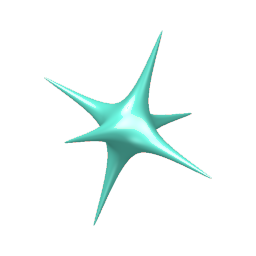

In [49]:
t0_ast = time()

In [50]:
f = x^2+y^2+z^2-(1 - 2^10*(x^2*y^2+y^2*z^2+z^2*x^2))

En anulador de esta función esta obtenido en `Magma`, y nos lo proporcionó Marc Mezzarobba.

In [51]:
P_v = D^3 + (-2/3*t^16 - 23253/5120*t^14 + 43466107/3932160*t^12 - 18561678325/3221225472*t^10 - 62061435919/412316860416*t^8 + 107219494038565/1688849860263936*t^6 + 898481918117681/17293822569102704640*t^4 + 75801892021701641/5902958103587056517120*t^2 - 33062080717215/1180591620717411303424)/(t^17 - 32761/5120*t^15 + 51262429/5242880*t^13 - 4676660033/1073741824*t^11 - 15872084487/549755813888*t^9 + 6142269234783/1125899906842624*t^7 - 10331811080577/720575940379279360*t^5 + 56312449969645559/5902958103587056517120*t^3 + 11020693572405/1180591620717411303424*t)*D^2 + (2/3*t^18 + 49209/2560*t^16 - 317419373/7864320*t^14 + 328344954737/16106127360*t^12 + 102879404089/1649267441664*t^10 + 23148613901909/1688849860263936*t^8 + 129551019391069/17293822569102704640*t^6 - 38122030027239427/5902958103587056517120*t^4 + 93475961250439159/6044629098073145873530880*t^2 + 33062080717215/1208925819614629174706176)/(t^20 - 8189/1280*t^18 + 12807417/1310720*t^16 - 2916504717/671088640*t^14 - 36420829007/1099511627776*t^12 + 6110525065809/1125899906842624*t^10 - 51943142470701/5764607523034234880*t^8 + 56229795481000943/5902958103587056517120*t^6 + 112738401060359159/6044629098073145873530880*t^4 + 11020693572405/1208925819614629174706176*t^2)*D + (-30063/1024*t^13 + 3842833/65536*t^11 - 47111517337/1610612736*t^9 + 93462273353/1099511627776*t^7 - 308160968699729/3377699720527872*t^5 - 286459505288135/3458764513820540928*t^3)/(t^18 - 8189/1280*t^16 + 12807417/1310720*t^14 - 2916504717/671088640*t^12 - 36420829007/1099511627776*t^10 + 6110525065809/1125899906842624*t^8 - 51943142470701/5764607523034234880*t^6 + 56229795481000943/5902958103587056517120*t^4 + 112738401060359159/6044629098073145873530880*t^2 + 11020693572405/1208925819614629174706176)
operador_v = P_v*D

Lo primero que necesitamos calcular son los valores para los que $x$ está definida, y vemos que está definida en $x \in [-1,1]$.

In [52]:
resy = f.resultant(diff(f,y),y)
resz = f.resultant(diff(f,z),z)

In [53]:
%time s = ssolve([f,resy,resz],x,y,z,solution_dict=True)
s

CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.07 s


[{x: -1, y: 0, z: 0}, {x: 1, y: 0, z: 0}]

In [54]:
x0 = -1
x1 = 1

En este caso las condiciones que debemos imponer, en vez de ser longitudes de segmentos, son áreas de regiones, pero podemos proceder de la misma forma que con el área de la pantalla de la televisión para calcular estas áreas.

### Cálculo de las condiciones iniciales

Al igual que antes, si calculamos los puntos singulares de `operador_v`, obtenemos:

In [55]:
g = t^20 - 8189/1280*t^18 + 12807417/1310720*t^16 - 2916504717/671088640*t^14 - 36420829007/1099511627776*t^12 + 6110525065809/1125899906842624*t^10 - 51943142470701/5764607523034234880*t^8 + 56229795481000943/5902958103587056517120*t^6 + 112738401060359159/6044629098073145873530880*t^4 + 11020693572405/1208925819614629174706176*t^2

In [56]:
[root[0] for root in R(g(T)).roots(AA)]

[-2.098321031501715?,
 -1.000000000000000?,
 -0.999740834130045?,
 -0.2149997292187308?,
 0,
 0.2149997292187308?,
 0.999740834130045?,
 1.000000000000000?,
 2.098321031501715?]

En este caso ocurre exactamente lo mismo que en el anterior, tomando $x_{ord}=0$ el proceso funciona.

La primera condición la vamos a imponer en $x=0$.

Al igual que antes, calculamos el anulador de $f(0,y,z)$ en `Mathematica`. Y vemos entre qué valores se mueve $y$.

In [57]:
P = (-1-1023*t^2+1024*t^4)*D-1025*t

In [58]:
y0, y1 = extremos(f.subs({x:0}))

y0 =  -1.000000000000000? 
y1 =  1.000000000000000?


Por último, calculamos el área de $f(0,y,z)$, que será la condición a imponer en $x=0$.

In [59]:
A0 = area(P*D,condiciones([0,y0],f.subs({x:0})),y1,precision)

El área de nuestra superficie es 0.48165183275505533506328529077804218686620581937851455543324620944600222343186130016847120550693420638. 
Calculado en 0.7495124340057373 segundos.


Ralizamos el mismo proceso para $x=1/2$.

In [60]:
P = (-771+261124*t^2+1052672*t^4)*D-267268*t

In [61]:
y0, y1 = extremos(f.subs({x:1/2}))

y0 =  -0.05402118045492148? 
y1 =  0.05402118045492148?


In [62]:
A1_2 = area(P*D,condiciones([0,y0],f.subs({x:1/2})),y1,precision)

El área de nuestra superficie es 0.0091548042170890004419894567453910104709053015282794402718431658320086390917732841374636422657905812964. 
Calculado en 0.29424476623535156 segundos.


En este caso no podemos tomar el punto $-1/2$ y aprovechar la simetría de la región porque si calculamos la matriz de transición de $0$, que es el punto que estamos tomando como $x_{ord}$, a $-1/2$, vemos que tiene un error muy considerable de calculo, por lo que al resolver el sistema no obtendremos una solución precisa. 

Por este motivo, tomaremos la última condición en $x=-1/3$.

In [63]:
P = (-8264+993361*t^2+9520128*t^4)*D-1140817*t

In [64]:
y0,y1 = extremos(f.subs({x:-1/3}))

y0 =  -0.0880024641034929? 
y1 =  0.0880024641034929?


In [65]:
A1_3 = area(P*D,condiciones([0,y0],f.subs({x:-1/3})),y1,precision)

El área de nuestra superficie es 0.024124985557108578974455107835940772043300800195899130584865011180251997105247786084231451125119581187. 
Calculado en 0.18521666526794434 segundos.


### Cálculo del volumen

Una vez tenemos todas las condiciones necesarias, creamos el vector `cond` de la misma manera que hicimos para el área de la televisión. Y usamos la función que creamos anteriormente, `area`, para calcular finalmente el volumen del **astroide**.

In [66]:
cond = [(1,0,A0),(1,1/2,A1_2),(1,-1/3,A1_3),(0,x0,0)]

In [67]:
astroide = area(operador_v,cond,x1,precision)

Step 0 --> 1/2 passes through or too close to singular point 0.2149997292187308? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.21+0.05j
Step 0 --> -1/3 passes through or too close to singular point -0.2149997292187308? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio -0.21+0.05j
Step 0 --> -1 passes through or too close to singular points -0.999740834130045?, -0.2149997292187308? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio -0.21+0.05j
Step 0 --> 1 passes through or too close to singular points 0.2149997292187308?, 0.999740834130045? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.21+0.05j
El área de nuestra superficie es 0.10857542146036093773950339599420761981091787444660747544447582299328536067303292819494347441406406678 + 4.4978197824336082309873982946959896

In [68]:
t1_ast = time()
print(f'Área del Astroide calculada en {t1_ast-t0_ast} segundos.')

Área del Astroide calculada en 36.479689598083496 segundos.


En este caso también podemos ver que tomando otro punto como $x_{ord}$ obtenemos una solución errónea.

In [69]:
cond = [(1,1/2,A1_2),(1,-1/2,A1_2),(1,-1/3,A1_3),(0,x0,0)]

In [70]:
astroide2 = area(operador_v,cond,x1,precision)

Step 1/2 --> -1/2 passes through or too close to singular points -0.2149997292187308?, 0, 0.2149997292187308? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.21+0.05j
Step 1/2 --> -1/3 passes through or too close to singular points -0.2149997292187308?, 0, 0.2149997292187308? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.21+0.05j
Step 1/2 --> -1 passes through or too close to singular points -0.999740834130045?, -0.2149997292187308?, 0, 0.2149997292187308? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.21+0.05j
Step 1/2 --> 1 passes through or too close to singular point 0.999740834130045? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.99+0.05j
El área de nuestra superficie es -0.1908556890608431151609629258120561671209207155160764028849229671779890075599910

## Cálculo del volumen de un *pretzel*

En este caso calcularemos el volumen dentro de un *pretzel*, dado por la ecuación $$\{ (x,y,z) \in \mathbb{R}^3 \ | \ (x^2(1 - x^2) - y^2)^2 + z^2 - 1/100 \leq 0 \}.$$

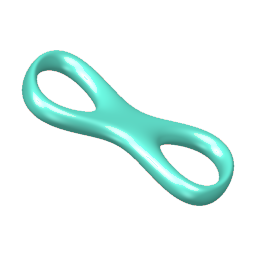

In [71]:
t0_pret = time()

In [72]:
f = (x^2*(1 - x^2) - y^2)^2 + z^2 - 1/100

Al igual que antes, Marc Mezzarobba nos proporcionó el anulador calculado con `Magma` que anula a nuestra $v$.

In [73]:
P_v = (t^24 - 6*t^22 + 61/4*t^20 - 85/4*t^18 + 514187/29400*t^16 - 31081/3675*t^14 + 10271/4704*t^12 - 23453/117600*t^10 - 4563/245000*t^8 + 7787/2940000*t^6 + 19/2352000*t^4 - 19/11760000*t^2)*D^3 + (-23/5*t^23 + 134/5*t^21 - 1293/20*t^19 + 414/5*t^17 - 8757701/147000*t^15 + 843439/36750*t^13 - 2134439/588000*t^11 - 11693/58800*t^9 + 212761/1837500*t^7 - 84001/7350000*t^5 - 437/19600000*t^3 + 19/14700000*t)*D^2 + (-21/5*t^22 + 86/5*t^20 - 631/20*t^18 + 38*t^16 - 1692939/49000*t^14 + 1574899/73500*t^12 - 8241/1120*t^10 + 336649/294000*t^8 - 87779/700000*t^6 + 3277/300000*t^4 + 19/2352000*t^2 - 19/14700000)*D + 216/5*t^21 - 972/5*t^19 + 1836/5*t^17 - 378*t^15 + 2811793/12250*t^13 - 403933/4900*t^11 + 39899/2450*t^9 - 1706/1225*t^7 + 209/19600*t^5 - 209/196000*t^3
operador_v = P_v*D

Calculamos el mínimo y el máximo para $x$.

In [74]:
resy = f.resultant(diff(f,y),y)
resz = f.resultant(diff(f,z),z)

In [75]:
%time s = ssolve([f,resy,resz],x,y,z,solution_dict=True)
s

CPU times: user 625 ms, sys: 0 ns, total: 625 ms
Wall time: 618 ms


[{x: -I*sqrt(-1/2 + sqrt(35)/10), y: -sqrt(5)*I/5, z: 0},
 {x: -I*sqrt(-1/2 + sqrt(35)/10), y: sqrt(5)*I/5, z: 0},
 {x: I*sqrt(-1/2 + sqrt(35)/10), y: -sqrt(5)*I/5, z: 0},
 {x: I*sqrt(-1/2 + sqrt(35)/10), y: sqrt(5)*I/5, z: 0},
 {x: -sqrt(1/2 - sqrt(15)/10), y: 0, z: 0},
 {x: -sqrt(1/2 - sqrt(15)/10), y: -sqrt(5)/5, z: 0},
 {x: -sqrt(1/2 - sqrt(15)/10), y: sqrt(5)/5, z: 0},
 {x: sqrt(1/2 - sqrt(15)/10), y: 0, z: 0},
 {x: sqrt(1/2 - sqrt(15)/10), y: -sqrt(5)/5, z: 0},
 {x: sqrt(1/2 - sqrt(15)/10), y: sqrt(5)/5, z: 0},
 {x: -sqrt(1/2 - sqrt(35)/10), y: 0, z: 0},
 {x: sqrt(1/2 - sqrt(35)/10), y: 0, z: 0},
 {x: -sqrt(1/2 + sqrt(35)/10), y: 0, z: 0},
 {x: -sqrt(1/2 + sqrt(35)/10), y: -sqrt(5)*I/5, z: 0},
 {x: -sqrt(1/2 + sqrt(35)/10), y: sqrt(5)*I/5, z: 0},
 {x: sqrt(1/2 + sqrt(35)/10), y: 0, z: 0},
 {x: sqrt(1/2 + sqrt(35)/10), y: -sqrt(5)*I/5, z: 0},
 {x: sqrt(1/2 + sqrt(35)/10), y: sqrt(5)*I/5, z: 0},
 {x: -sqrt(sqrt(15)/10 + 1/2), y: 0, z: 0},
 {x: -sqrt(sqrt(15)/10 + 1/2), y: -sqrt(5)/

Y nos quedamos solo con los puntos con coordenadas reales, en este caso vemos que tenemos tres pares de puntos, esto se debe a que el par de mayor módulo son el mínimo y máximo para la $x$, el segundo par de mayor módulo es el correspondiente al borde exterior de los agujeros del *pretzel*, y el último par es el borde interior de los agujeros. 

In [76]:
xd = [-sqrt(1/2 - sqrt(15)/10),sqrt(1/2 - sqrt(15)/10),-sqrt(1/2 + sqrt(35)/10),sqrt(1/2 + sqrt(35)/10),-sqrt(sqrt(15)/10 + 1/2),sqrt(sqrt(15)/10 + 1/2)]
[x.n() for x in xd]

[-0.335710687019729,
 0.335710687019729,
 -1.04480044903798,
 1.04480044903798,
 -0.941965145119893,
 0.941965145119893]

Nos interesa conocer los tres pares, pero el volumen lo calcularemos entre el par de mayor módulo, así que les damos un nombre para que sea más cómodo usarlos.

In [77]:
x0 = xd[2]
x1 = xd[3]

Una vez ya tenemos el anulador y los valores máximo y mínimo de $x$, ya solo nos queda calcular las condiciones iniciales suficientes, en este caso el `operador_v` es de orden 4 así que necesitaremos tres más la condición de que en $x_0$ valga 0.

### Cálculo de las condiciones iniciales

Calculemos primero los puntos singulares de nuestro operador, para ver que puntos no podemos tomar como $x_{ord}$. El coeficiente de mayor orden de `operador_v` es:

In [78]:
g = t^24 - 6*t^22 + 61/4*t^20 - 85/4*t^18 + 514187/29400*t^16 - 31081/3675*t^14 + 10271/4704*t^12 - 23453/117600*t^10 - 4563/245000*t^8 + 7787/2940000*t^6 + 19/2352000*t^4 - 19/11760000*t^2

In [79]:
[root[0] for root in R(g.subs({t:T})).roots(AA)]

[-1.04480044903798?,
 -1.012327152726?,
 -1.0000000000000?,
 -0.9868622089859?,
 -0.94196514511990?,
 -0.7071067811865475?,
 -0.3357106870197288?,
 -0.1615641682907841?,
 0,
 0.1615641682907841?,
 0.3357106870197288?,
 0.7071067811865475?,
 0.94196514511990?,
 0.9868622089859?,
 1.000000000000?,
 1.012327152726?,
 1.04480044903798?]

La primera condición la impondremos sobre $x=1/3$. Como hemos hecho hasta ahora, todos los anuladores están calculados en `Mathematica`. Y procedemos de la misma manera que con los ejemplos anteriores. Como nuestra región es simétrica, la condición para $x=-1/3$ coincidirá con la que calculemos ahora.

In [80]:
P = (-161-129600*t^2+656100*t^4)*D-16200*t*(-8+81*t^2)
operador = P*D

In [81]:
y0,y1 = extremos(f.subs({x:1/3}))

y0 =  -0.4458311699497529? 
y1 =  0.4458311699497529?


In [82]:
A1_3 = area(operador,condiciones([0,y0],f.subs({x:1/3})),y1,precision)

El área de nuestra superficie es 0.12193049978583152187557242641850931713389114982417512311016741749054513029636938647987858967027065690. 
Calculado en 0.6383311748504639 segundos.


La última condición la imponemos sobre $x=1/5$.

In [83]:
P = (-13321-120000*t^2+1562500*t^4)*D+(120000*t-3125000*t^3)
operador = P*D

In [84]:
y0,y1 = extremos(f.subs({x:1/5}))

y0 =  -0.3720215047547655? 
y1 =  0.3720215047547655?


In [85]:
A1_5 = area(operador,condiciones([0,y0],f.subs({x:1/5})),y1,precision)

El área de nuestra superficie es 0.13288258395850223699502197839138857140529038165282242442113863144535212336167906938329238605332164561. 
Calculado en 0.31058740615844727 segundos.


### Cálculo del volumen

Por último, solo debemos crear el vector `cond` y calcular el volumen con la función `area` definida anteriormente.

In [86]:
cond = [(1,1/3,A1_3),(1,-1/3,A1_3),(1,1/5,A1_5),(0,x0,0)]

In [87]:
pretzel = area(operador_v,cond,x1,precision)

Step 1/3 --> -1/3 passes through or too close to singular points -0.1615641682907841?, 0, 0.1615641682907841? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.16+0.05j
Step 1/3 --> -1/10*a^3 - a passes through or too close to singular points -1.012327152726?, -1, -0.986862208986?, -0.94196514511989?, -0.7071067811865475?, -0.3357106870197288?, -0.1615641682907841?, 0, 0.1615641682907841? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.16+0.05j
Step 1/3 --> 1/10*a^3 + a passes through or too close to singular points 0.3357106870197288?, 0.7071067811865475?, 0.94196514511989?, 0.986862208986?, 1, 1.012327152726? (to compute the connection to a singular point, make it a vertex of the path)
Inserte punto intermedio 0.33+0.05j
El área de nuestra superficie es 0.19716703100601195200543797720540697966824110671375940268322685211275869905250724231224199323252392090. 
Calculado en 33.

In [88]:
t1_pret = time()
print(f'Área del Pretzel calculada en {t1_pret-t0_pret} segundos.')

Área del Pretzel calculada en 36.77028274536133 segundos.


In [89]:
t1_archivo = time()
print(f'Con una precision de {precision} dígitos, el tiempo de ejecución del archivo es {t1_archivo-t0_archivo} segundos.')

Con una precision de 100 dígitos, el tiempo de ejecución del archivo es 449.467116355896 segundos.
